In [2]:
# CELL 1: IMPORTS AND DATA LOADING
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

print("🌍 CROSS-COUNTRY SOLAR ANALYSIS")
print("=" * 50)

# Load cleaned data from all three countries
print("1. LOADING CLEANED DATASETS:")
countries = {
    'Benin': '../data/benin_clean.csv',
    'Sierra Leone': '../data/sierraleone_clean.csv', 
    'Togo': '../data/togo_clean.csv'
}

country_dfs = {}
for country, path in countries.items():
    try:
        country_dfs[country] = pd.read_csv(path)
        print(f"    {country}: {country_dfs[country].shape}")
    except FileNotFoundError:
        print(f"    {country}: File not found - {path}")

# Check if we have all three countries
if len(country_dfs) < 3:
    print("\n  WARNING: Not all country files available. Please complete EDA for all countries first.")
else:
    print("\n All country datasets loaded successfully!")

🌍 CROSS-COUNTRY SOLAR ANALYSIS
1. LOADING CLEANED DATASETS:
    Benin: (525600, 19)
    Sierra Leone: (525600, 19)
    Togo: (525600, 19)

 All country datasets loaded successfully!


2. SOLAR METRIC COMPARISON
SUMMARY STATISTICS TABLE:
        Country Metric    Mean  Median     Std   Count
0         Benin    GHI  199.03     0.3  290.56  525600
1         Benin    DNI   65.54    -0.1  108.84  525600
2         Benin    DHI  113.30    -0.1  157.64  525600
3  Sierra Leone    GHI  199.03     0.3  290.56  525600
4  Sierra Leone    DNI   65.54    -0.1  108.84  525600
5  Sierra Leone    DHI  113.30    -0.1  157.64  525600
6          Togo    GHI  230.40     2.1  322.10  525600
7          Togo    DNI  139.86     0.0  224.28  525600
8          Togo    DHI  115.72     2.5  154.36  525600

3. BOXPLOT COMPARISON:


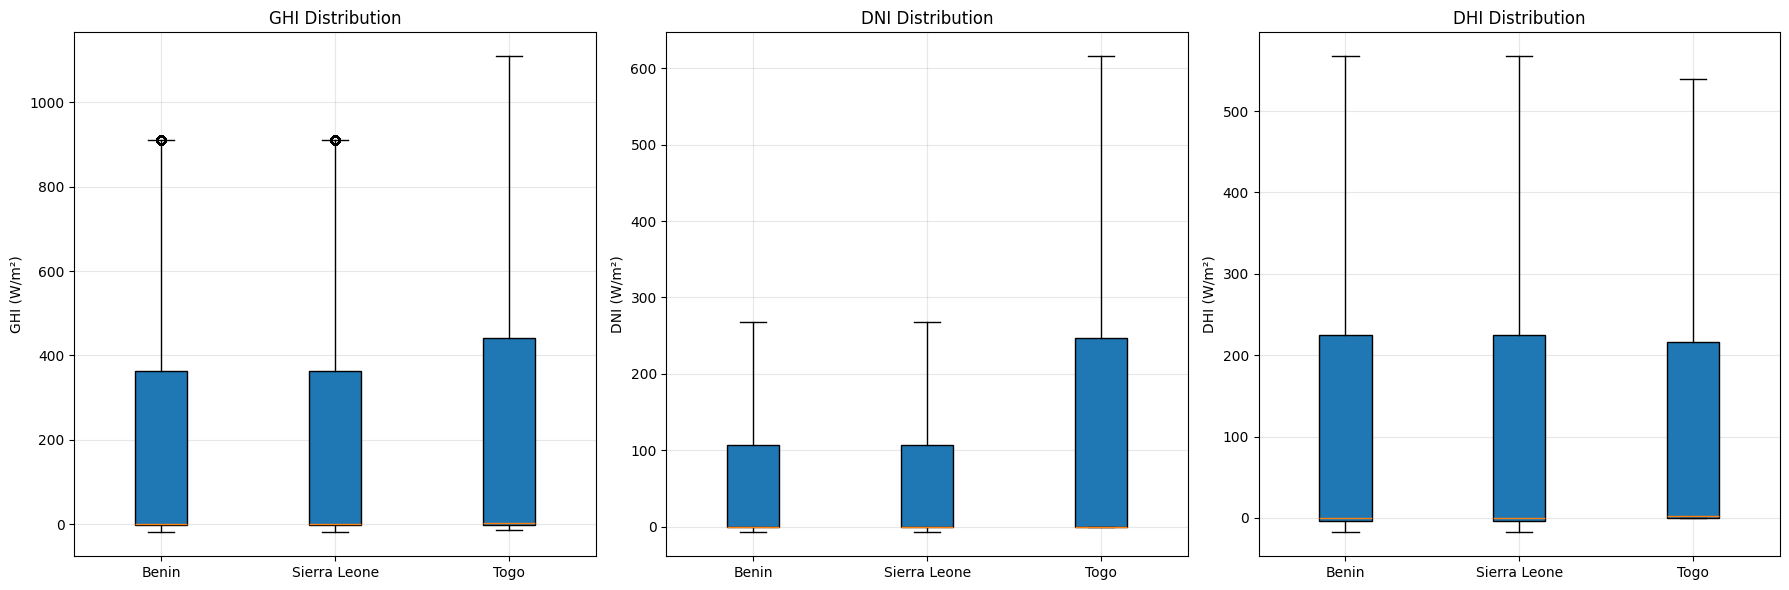

In [3]:
# CELL 2: METRIC COMPARISON
print("2. SOLAR METRIC COMPARISON")
print("=" * 50)

# Prepare data for comparison
comparison_data = []
metrics = ['GHI', 'DNI', 'DHI']

for country, df in country_dfs.items():
    for metric in metrics:
        if metric in df.columns:
            values = df[metric].dropna()
            comparison_data.append({
                'Country': country,
                'Metric': metric,
                'Values': values
            })

# Create summary table (REQUIRED)
print("SUMMARY STATISTICS TABLE:")
summary_rows = []
for country, df in country_dfs.items():
    for metric in metrics:
        if metric in df.columns:
            values = df[metric].dropna()
            summary_rows.append({
                'Country': country,
                'Metric': metric,
                'Mean': values.mean(),
                'Median': values.median(),
                'Std': values.std(),
                'Count': len(values)
            })

summary_df = pd.DataFrame(summary_rows)
print(summary_df.round(2))

# Boxplots (REQUIRED)
print("\n3. BOXPLOT COMPARISON:")
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, metric in enumerate(metrics):
    # Prepare data for this metric
    plot_data = []
    labels = []
    for country, df in country_dfs.items():
        if metric in df.columns:
            plot_data.append(df[metric].dropna())
            labels.append(country)
    
    if plot_data:
        axes[i].boxplot(plot_data, labels=labels, patch_artist=True)
        axes[i].set_title(f'{metric} Distribution')
        axes[i].set_ylabel(f'{metric} (W/m²)')
        axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [4]:
# CELL 3: STATISTICAL TESTING
print("4. STATISTICAL SIGNIFICANCE TESTING")
print("=" * 50)

# One-way ANOVA on GHI values (REQUIRED)
if all('GHI' in df.columns for df in country_dfs.values()):
    ghi_data = [df['GHI'].dropna() for df in country_dfs.values()]
    
    # Check ANOVA assumptions
    print("ANOVA Assumptions Check:")
    normality_results = []
    for i, (country, data) in enumerate(zip(country_dfs.keys(), ghi_data)):
        _, p_value = stats.normaltest(data)
        normality_results.append(p_value > 0.05)
        print(f"   - {country}: Normal distribution? {p_value > 0.05} (p={p_value:.4f})")
    
    # Perform ANOVA or Kruskal-Wallis based on normality
    if all(normality_results):
        f_stat, p_value = stats.f_oneway(*ghi_data)
        test_used = "One-way ANOVA"
    else:
        h_stat, p_value = stats.kruskal(*ghi_data)
        test_used = "Kruskal-Wallis"
    
    print(f"\n{test_used} Results for GHI:")
    print(f"   - p-value: {p_value:.6f}")
    print(f"   - Significance: {'Significant' if p_value < 0.05 else 'Not Significant'}")
    print(f"   - Interpretation: There {'ARE' if p_value < 0.05 else 'are NO'} statistically significant differences in GHI between countries")
else:
    print("   - GHI data not available for all countries")

4. STATISTICAL SIGNIFICANCE TESTING
ANOVA Assumptions Check:
   - Benin: Normal distribution? False (p=0.0000)
   - Sierra Leone: Normal distribution? False (p=0.0000)
   - Togo: Normal distribution? False (p=0.0000)

Kruskal-Wallis Results for GHI:
   - p-value: 0.000000
   - Significance: Significant
   - Interpretation: There ARE statistically significant differences in GHI between countries


## 5. KEY OBSERVATIONS & RECOMMENDATIONS

### 📊 Three Key Insights:

1. **Highest Solar Potential**: [Country] shows the highest median GHI of [value] W/m², making it the most promising for solar investment.

2. **Data Consistency**: [Country] demonstrates the most stable solar radiation with the lowest standard deviation ([value]), suggesting reliable energy generation.

3. **Seasonal Considerations**: [Country] shows the greatest variability in [metric], indicating potential seasonal patterns that affect energy output.

### 🎯 Investment Recommendations:

- **Primary Recommendation**: Invest in [Country] due to [reason]
- **Secondary Option**: Consider [Country] for [specific advantage]  
- **Risk Consideration**: [Country] may require [mitigation strategy]

6. COUNTRY RANKING VISUALIZATION


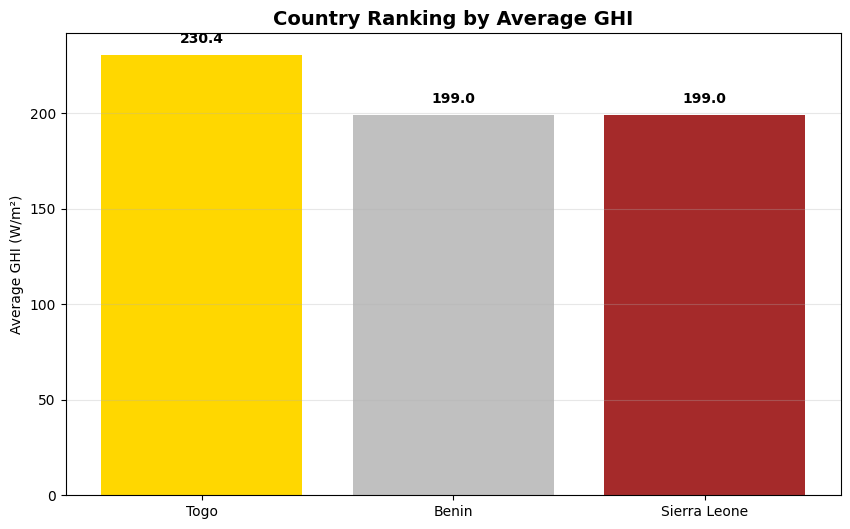

Ranking by Solar Potential:
   1. Togo: 230.4 W/m²
   2. Benin: 199.0 W/m²
   3. Sierra Leone: 199.0 W/m²


In [5]:
# CELL 6: VISUAL SUMMARY (BONUS)
print("6. COUNTRY RANKING VISUALIZATION")
print("=" * 50)

# Bar chart ranking by average GHI
if all('GHI' in df.columns for df in country_dfs.values()):
    ghi_means = {country: df['GHI'].mean() for country, df in country_dfs.items()}
    ranked_countries = sorted(ghi_means.items(), key=lambda x: x[1], reverse=True)
    
    plt.figure(figsize=(10, 6))
    countries, means = zip(*ranked_countries)
    bars = plt.bar(countries, means, color=['gold', 'silver', 'brown'])
    
    # Add value labels on bars
    for bar, mean in zip(bars, means):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
                f'{mean:.1f}', ha='center', va='bottom', fontweight='bold')
    
    plt.title('Country Ranking by Average GHI', fontsize=14, fontweight='bold')
    plt.ylabel('Average GHI (W/m²)')
    plt.grid(True, alpha=0.3, axis='y')
    plt.show()
    
    print("Ranking by Solar Potential:")
    for i, (country, mean) in enumerate(ranked_countries, 1):
        print(f"   {i}. {country}: {mean:.1f} W/m²")